In [20]:
import math
import torch
import matplotlib.pyplot as plt

In [21]:
# 학습용 데이터
x = torch.linspace(-math.pi, math.pi,1000)
# 정답
y = torch.sin(x)

In [22]:
# 3차 다항식
# f(x) = ax**3 + bx**2 + cx + d
# 초기화
a,b,c,d = torch.randn(()),torch.randn(()),torch.randn(()),torch.randn(())
y_random = a*x**3 + b*x**2 + c*x + d

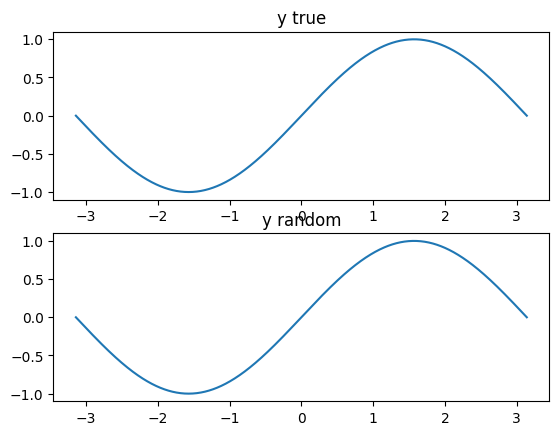

In [23]:
# 시각화
# 1. 실제값 시각화 = 정답값 3차원 수식
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x,y)   #x는 임의의 값, y는 실제 sin값

# 2. 임의의 가중치로 만든 예측용 값으로 시각화
plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x,y)

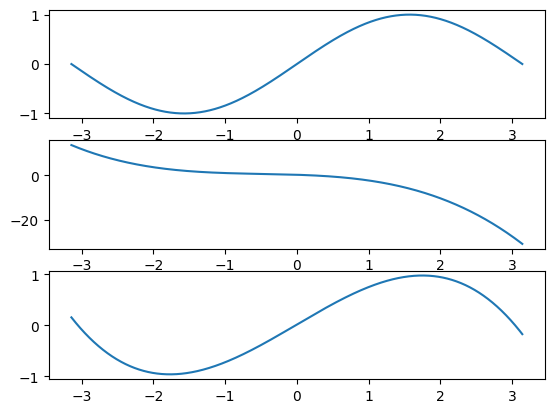

In [24]:
# 파라메터 정의
learning_rate = 1e-6
total_loss = []
for epoch in range(2000):
    # 전체 학습과정을 몇번 반복할것인지. 
    # 전체 데이터 학습 1회 = epoch
    # 즉 a,b,c,d를 2000번 업데이트 하겠다는 의미
    # forward : 아까 만든 3차원 방정식에 x값을 넣고 a,b,c,d값을 넣겠다는 의미
    y_pred =  a*x**3 + b*x**2 + c*x + d     # 모델

    # 손실을 계산하기 위해서는 손실을 정의해야한다. 
    # MSE 평균 제곱오차가 필요
    # 오차를 제곱하는 이유는 음수를 방지하기 위함이다.
    # 음수를 방지하여 크기만 보도록 하기 위해
    # 오차가 큰 값에 더 큰 패널티를 부여하기 위해서
    loss = torch.sqrt((y_pred - y)**2).mean().item()    # 텐서에 저장된 숫자값만 추출(그래프 추적을 피함)

    total_loss.append(loss)
    #if epoch % 100 == 0:
    #    print(f'epoch{epoch+1} :  loss : {loss}')

    # 역전파 계산(BackPropagation) loss 줄이기 위해서 a,b,c,d 어느 방향으로 움직여야 할 지 계산
    # 미분
    grad_y_pred = 2.0*(y_pred - y)  # 기울기의 미분값
    grad_a = 2.0*(grad_y_pred*x**3).sum()   # 기울기의 각각의 미분값을 모두 더함
    grad_b = 2.0*(grad_y_pred*x**2).sum()
    grad_c = 2.0*(grad_y_pred*x).sum()
    grad_d = 2.0*(grad_y_pred).sum()

    # 가중치 업데이트
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

plt.subplot(3,1,1)
plt.plot(x,y)           # 실제값
plt.subplot(3,1,2)
plt.plot(x,y_random)    # 랜덤값
plt.subplot(3,1,3)
plt.plot(x,y_pred)      # 학습값


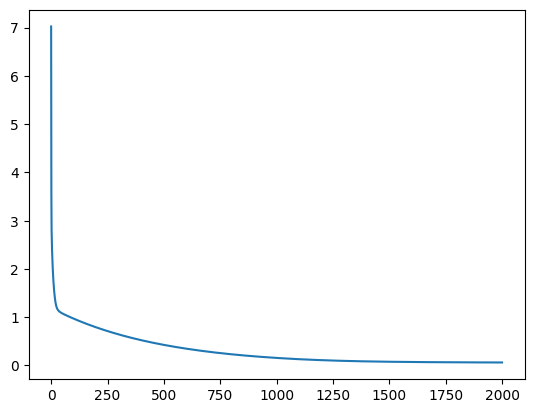

In [28]:
plt.plot(range(2000), total_loss)

D-loss / D-a
D-loss / D-b
D-loss / D-c
D-loss / D-d

loss는 파라메터들과 직접 연관이 없음
다만 다음과 같은 연쇄구조를 가진다(chain)

a,b,c,d -> y_pred를 예측해서 -> loss
손실함수 loss 자체는 
loss = (y_pred - loss)

D-loss / D-a = ( D-ypred / D-a ) * ( D-loss / D-y_pred )


D-ypred / D-a = x ** 3

D-loss / D-y_pred = 2 * (y_pred - y)

In [ ]:
# 회귀 모델 by Deeplearning
# 보스턴 집값 예측하기
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# pytorch
# 미분을 자동으로 계산
# 계산된 미분을 optimizer를 통해 적용 : 최적화 알고리즘
import torch
import torch.nn as nn
from torch.optim.adam import Adam
# 모델 정의
nn.Sequential([
    nn.Linear(data.shape[1], 100),  #13의 데이터를 입력받아서 결과를 10개 즉 100개를 예측
    nn.ReLU(),
    nn.Linear(100, 1)   #100개의 예측결과를 받아서 최종 1개를 예측
])